In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings

# Read in the Data

In [15]:
data = pd.read_csv("regression-data-set.csv")
data

,x,y
0,1.00,3.14
1,1.14,3.17
2,1.28,3.09
3,1.42,3.08
4,1.57,3.09
...,...,...
95,14.43,2.99
96,14.58,2.92
97,14.72,2.88
98,14.86,2.90


In [16]:
x = data.x.to_numpy()
y = data.y.to_numpy()

### Train Test Split

In [17]:
X_train, Y_train, X_test, Y_test = train_test_split(x,y,train_size=0.8)

## Fitting the Curve to a Cosine Function

Here we're actually trying to fit the data to a cosine function which appears to be what the data was originally generated from but the RMS Error is actually a little worse.

In [18]:
def func(x,a,b,c,d):
    return a+b*np.cos(c*x+d)

In [19]:
popt, pcov = curve_fit(func, x, y)

In [20]:
print(popt)

[ 3.08299973  0.19147694  1.01352441 -0.14274708]


In [7]:
a,b,c,d = popt
def fitted_func(x):
    return a+b*np.cos(c*x+d)

In [8]:
def cosine_curve_fit_rms(x,y,split):
    
    # Train Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,train_size=split)

    # Fitting the Model
    popt, pcov = curve_fit(func, x, y)
        
    a,b,c,d = popt
    def fitted_func(x):
        return a+b*np.cos(c*x+d)
        
    # Get Predictions
    preds = fitted_func(X_test)
    
    # Return RMS
    return np.sqrt( ((preds - Y_test)**2).sum() / len(preds) )

In [9]:
rms_errors = []
for _ in range(100):
    rms = cosine_curve_fit_rms(x,y,split=0.8)
    rms_errors.append(rms)
Cos_RMS_Mean = np.mean(rms_errors)
Cos_RMS_SD = np.std(rms_errors)
print(f"Mean: {Cos_RMS_Mean}. SD: {Cos_RMS_SD}")

Mean: 0.05467995461549203. SD: 0.005642866097000699


## Polynomial Regression

In [10]:
poly_regression = make_pipeline(PolynomialFeatures(degree=9))
xPoly = poly_regression.fit_transform(x.reshape(-1,1))
poly_regression.fit(xPoly,y)
linear_regression = LinearRegression()
linear_regression.fit(xPoly,y)

LinearRegression()

In [11]:
def poly_regression_rms(x,y,degree,split):
    
    # Train Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,train_size=split)
    X_train = X_train.reshape(-1)
    X_test = X_test.reshape(-1)

    # Fitting the Model
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.RankWarning)
        z = np.polyfit(X_train, Y_train, degree)
        p = np.poly1d(z)
        
    # Get Predictions
    preds = p(X_test)
    
    # Return RMS
    return np.sqrt( ((preds - Y_test)**2).sum() / len(preds) )

In [12]:
rms_errors = []
for _ in range(100):
    rms = poly_regression_rms(x,y,degree=9,split=0.8)
    rms_errors.append(rms)
Poly_RMS_Mean = np.mean(rms_errors)
Poly_RMS_SD = np.std(rms_errors)
print(f"Mean: {Poly_RMS_Mean}. SD: {Poly_RMS_SD}")

Mean: 0.04707751983563471. SD: 0.005109008492415337


# Comparing the Regressions

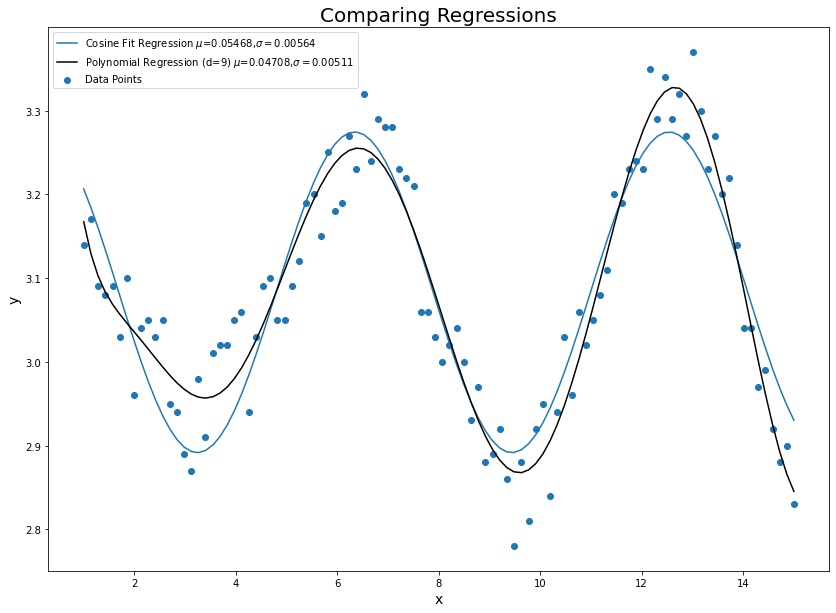

In [13]:
# Scatter and Plots
plt.scatter(x, y, label="Data Points")

plt.plot(x, fitted_func(x), 
         label=f"Cosine Fit Regression $\mu$={Cos_RMS_Mean:0.5f},$\sigma=${Cos_RMS_SD:0.5f}")

plt.plot(x,
         linear_regression.predict(poly_regression.fit_transform(x.reshape(-1,1))), 
         color='black',
         label=f"Polynomial Regression (d=9) $\mu$={Poly_RMS_Mean:0.5f},$\sigma=${Poly_RMS_SD:0.5f}")

# Little Details
plt.title("Comparing Regressions", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()

# Fig Stuff
fig = plt.gcf()
fig.set_size_inches(14,10)

What's also interesting is that there is more error but it looks like it will predict the data better.